In [7]:
from orion.benchmark import benchmark
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pipelines = [
    'tadgan'
]

signals = ['A-1', 'D-3', 'D-5', 'E-7', 'F-3', 'S-1']


param_ranges = {'epochs': np.arange(100, 1100, 100),
               'learning_rate': np.arange(0.0001, 0.001, 0.0001),
               'latent_dim': np.arange(5, 50, 5),
               'iterations_critic': np.arange(1,6,1),
               'batch_size': np.arange(16, 72, 8)}

metrics = ['f1', 'accuracy', 'recall', 'precision']

result_df = pd.DataFrame(columns = ['pipeline', 'rank', 'accuracy', 'dataset',
                                   'elapsed', 'f1', 'precision', 'recall', 'signal', 
                                    'split', 'status', 'IV', 'IV_value'])

In [ ]:
for IV in param_ranges.keys():
    hyperparameters = {
        'orion.primitives.tadgan.TadGAN#1': {
            'epochs': 1000,
            'learning_rate': 0.0005,
            'latent_dim': 20,
            'iterations_critic': 5,
            'batch_size': 64,
            'verbose': True
        }
    }
    for IV_value in param_ranges[IV]:
        hyperparameters['orion.primitives.tadgan.TadGAN#1'][IV] = IV_value
        scores = benchmark(pipelines=pipelines,
                           datasets=signals, 
                           hyperparameters=hyperparameters, 
                           metrics=metrics, 
                           rank='f1')
        scores['IV'] = IV
        scores['IV_value'] = IV_value
        result_df = result_df.append(scores, ignore_index=True)
result_df.to_csv('hyperparameter_testing.csv')        

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

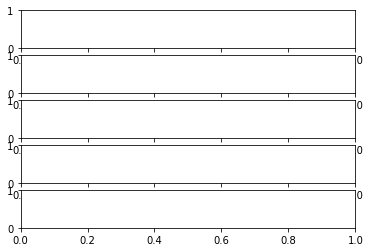

In [10]:
#graph results
fig, ax = plt.subplots(5,1)
i=0
for i in range(len(ax)):
    IV = list(param_ranges.keys())[i]
    ax[i].plot(list(param_ranges[IV]), list(result_df[result_df['IV'] == IV]['f1']))
    ax[i].set_title(IV + ' hyperparameter exploration')
    ax[i].set_xlabel(IV)
    ax[i].set_ylabel('f1 score')    
    i+=1
plt.show()